In [1]:
import sys 
sys.path.append('../../')  
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, results2quantities
import QuantumTomography as qt 
import matplotlib.pyplot as plt 
import numpy as np 
from qiskit import QuantumCircuit, Aer, IBMQ 
from qiskit.compiler import transpile 
import json 
from qiskit.result import Result 
from qiskit.test.mock import FakeCasablanca 
from utils_qiskit import * 
from utils_plots import *
from qiskit.providers.ibmq.managed import IBMQJobManager

In [2]:
jobs = [ '00d3107d150c4856bb145bc3fca2f147-16647947252239227',
            '7ce83169d75d4115a8dd2e839692d898-16655968534771705',
            '5373eb205b0e40f180632c1e0774aae4-1666877735257145',
            '04bb65c3638d4ee2bcb2039cf79f24fc-1666877752352261',
            'fce7c304165046509024a820e01ed340-16668777693586967' ]

In [3]:
choi_single = []
povm_single = []
choi_double = []
povm_double = []

quantities_single = []
quantities_double = []
correlations      = []
errores           = []
fit_single        = [] 
fit_double        = [] 
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]

for job in jobs:

    results_tomography = np.load( 'data_tomo_'+job+'.npy', allow_pickle=True ).all()

    results_single     = results_tomography.single                             
    results_double     = results_tomography.double                            
    results_gateset    = results_tomography.gateset   

    choi_single.append( results_single.chois )
    povm_single.append( results_single.povms )
    choi_double.append( [ results_double[j].chois for j in range(3)] )
    povm_double.append( [ results_double[j].povms for j in range(3)] )
    fit_single.append( [ np.array(idx)[:,2] for idx in results_tomography.single.funs ] )
    fit_double.append( [ np.array(idx)[:,2] for results in results_tomography.double for idx in results.funs ] ) 

    f0, f1, fc, fd = results_tomography.all_quantities(pairs)

    quantities_single.append( f0 )
    quantities_double.append( f1 )
    correlations.append( fc )
    errores.append( fd )

In [4]:
2**13*np.mean( fit_single, 0 ) , 2**13*np.sum( np.mean( fit_single, 0 ) , 1 )

(array([[ 62.14240282,  14.68549501],
        [ 31.66309563,  10.4250324 ],
        [109.01615231,  17.38093718],
        [ 36.99828152,  11.59911625],
        [ 22.39857908,  15.96561946],
        [ 27.13437706,   9.98834054],
        [ 16.85051171,  17.40586821]]),
 array([ 76.82789783,  42.08812803, 126.39708949,  48.59739776,
         38.36419855,  37.1227176 ,  34.25637992]))

In [5]:
# (array([[ 62.14240282,  14.68549501],
#         [ 31.66309563,  10.4250324 ],
#         [109.01615231,  17.38093718],
#         [ 36.99828152,  11.59911625],
#         [ 22.39857908,  15.96561946],
#         [ 27.13437706,   9.98834054],
#         [ 16.85051171,  17.40586821]]),
#  array([ 76.82789783,  42.08812803, 126.39708949,  48.59739776,
#          38.36419855,  37.1227176 ,  34.25637992]))

In [6]:
2**13*np.mean( fit_double, 0 ), 2**13*np.sum( np.mean( fit_double, 0 ) , 1 )

(array([[276.83361915, 207.64292787, 223.85618634, 176.10000893],
        [255.24700012, 206.39961152, 218.76514387, 184.71522778],
        [294.18192615, 239.65820077, 252.90888595, 180.12799198],
        [421.69878766, 390.54284743, 254.38908293, 222.65749042],
        [511.33876662, 476.60988235, 454.44416491, 367.01736955],
        [257.5351576 , 255.67789944, 210.74933054, 190.48496446]]),
 array([ 884.43274228,  865.12698329,  966.87700486, 1289.28820843,
        1809.41018342,  914.44735205]))

In [7]:
# array([[276.83361915, 207.64292787, 223.85618634, 176.10000893],
#        [255.24700012, 206.39961152, 218.76514387, 184.71522778],
#        [294.18192615, 239.65820077, 252.90888595, 180.12799198],
#        [421.69878766, 390.54284743, 254.38908293, 222.65749042],
#        [511.33876662, 476.60988235, 454.44416491, 367.01736955],
#        [257.5351576 , 255.67789944, 210.74933054, 190.48496446]])

In [8]:
from scipy.stats import chi2

46.92181013458685

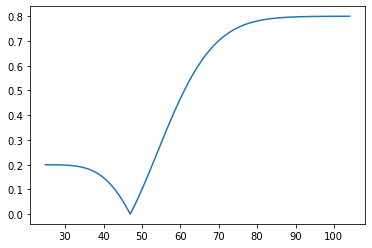

In [9]:
df = 2 * ( 6*6 - 6 - 4 + 2 )
alpha = 0.80
x = np.linspace(chi2.ppf(0.0001, df),
                chi2.ppf(0.9999, df), 1000)
cf = 1-chi2.cdf( x, df )
plt.plot(x, abs( alpha-cf) )
x[ np.argmin( abs( alpha-cf) ) ]

4762.842679449482

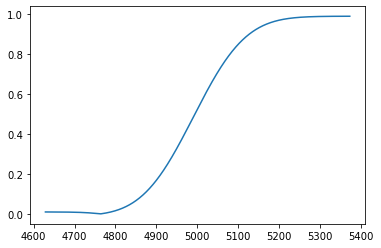

In [10]:
df = 4*( (6*6)**2 - 6**2 - 4**2 + 2**2 )
alpha = 0.99
x = np.linspace(chi2.ppf(0.0001, df),
                chi2.ppf(0.9999, df), 1000)
cf = 1 - chi2.cdf( x, df )
plt.plot(x, abs( alpha-cf) )
x[ np.argmin( abs( alpha-cf)  ) ]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


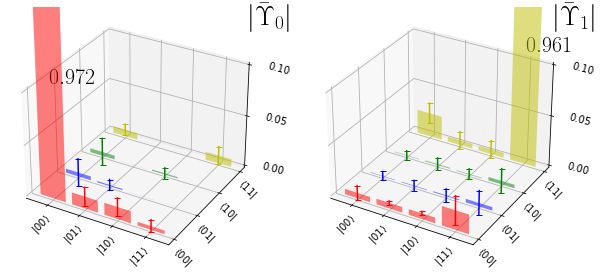

In [11]:
choi_single_mean = np.mean(choi_single, axis=(0,1))
choi_single_std = np.std(choi_single,axis=(0,1))

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\bar\Upsilon_0|$', r'$|\bar\Upsilon_1|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mean , error_choi=choi_single_std, shape=(1,2) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_mean_single.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_mean_single.svg', bbox_inches='tight', transparent=True ) 

In [12]:
abs(choi_single_mean[0]), abs(choi_single_mean[1])

(array([[9.71872306e-01, 3.98132396e-03, 3.98132396e-03, 6.86772872e-03],
        [1.19144456e-02, 1.29193391e-03, 1.03740469e-04, 1.16487144e-04],
        [1.19144456e-02, 1.03740469e-04, 1.29193391e-03, 1.16487144e-04],
        [3.59537173e-03, 2.55644281e-05, 2.55644281e-05, 8.04023272e-03]]),
 array([[5.39000350e-03, 5.13501420e-04, 5.13501420e-04, 2.40401877e-02],
        [5.60472643e-03, 6.42830657e-04, 9.52190122e-04, 4.92707327e-03],
        [5.60472643e-03, 9.52190122e-04, 6.42830657e-04, 4.92707327e-03],
        [1.91589825e-02, 3.50498611e-03, 3.50498611e-03, 9.61035187e-01]]))

In [13]:
1-np.exp(-700/100000),  0.007*100/0.02

(0.0069755570667648925, 35.0)

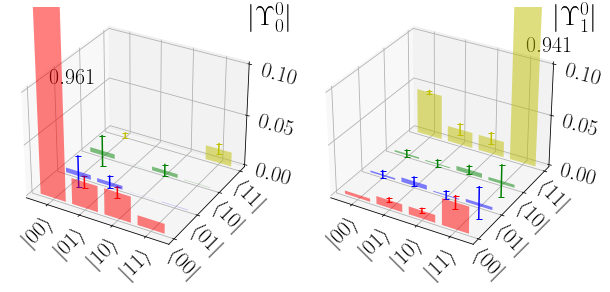

In [14]:
choi_single_mc_mean = np.mean(choi_single,axis=0)
choi_single_mc_std = np.std(choi_single,axis=0)

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^0|$', r'$|\Upsilon_1^0|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mc_mean[0], choi_single_mc_std[0], shape=(1,2)  )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_worst.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_single_worst.svg', bbox_inches='tight', transparent=True )

In [15]:
abs( choi_single_mc_mean[0][0] ), abs( choi_single_mc_mean[0][1] )

(array([[9.60761756e-01, 4.72668019e-03, 4.72668019e-03, 6.24082763e-05],
        [2.57792028e-02, 3.82723986e-03, 1.11531387e-04, 5.66618602e-05],
        [2.57792028e-02, 1.11531387e-04, 3.82723986e-03, 5.66618602e-05],
        [9.66130683e-03, 3.11165282e-04, 3.11165282e-04, 1.42925229e-02]]),
 array([[0.00319289, 0.00168469, 0.00168469, 0.04500185],
        [0.00782675, 0.0045002 , 0.00098213, 0.01569854],
        [0.00782675, 0.00098213, 0.0045002 , 0.01569854],
        [0.02639967, 0.00302183, 0.00302183, 0.9406276 ]]))

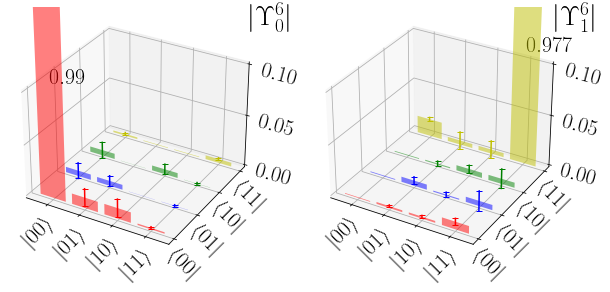

In [16]:

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^6|$', r'$|\Upsilon_1^6|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mc_mean[6], choi_single_mc_std[6], shape=(1,2) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_best.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_single_best.svg', bbox_inches='tight', transparent=True )

In [17]:
choi_single_mc_mean[6][0], choi_single_mc_mean[6][1]

(array([[ 9.90294635e-01+0.j        , -3.20040985e-03+0.00436986j,
         -3.20040985e-03-0.00436986j,  1.82167839e-03+0.j        ],
        [ 5.83096241e-03-0.00857201j, -3.28635096e-03-0.0036479j ,
          7.72393781e-05-0.00015084j, -4.60723817e-04-0.00037141j],
        [ 5.83096241e-03+0.00857201j,  7.72393781e-05+0.00015084j,
         -3.28635096e-03+0.0036479j , -4.60723817e-04+0.00037141j],
        [ 1.43417921e-03+0.j        ,  9.96476539e-05+0.00020135j,
          9.96476539e-05-0.00020135j,  3.84080944e-03+0.j        ]]),
 array([[ 7.21681772e-04+0.00000000e+00j, -3.70743326e-04-7.40985932e-04j,
         -3.70743326e-04+7.40985932e-04j,  1.72820340e-02+0.00000000e+00j],
        [-1.40202839e-03-1.23457106e-03j,  1.93204723e-03-4.86151533e-03j,
          1.15406244e-03-1.82514088e-05j,  1.30868811e-03+3.94398233e-03j],
        [-1.40202839e-03+1.23457106e-03j,  1.15406244e-03+1.82514088e-05j,
          1.93204723e-03+4.86151533e-03j,  1.30868811e-03-3.94398233e-03j],
     

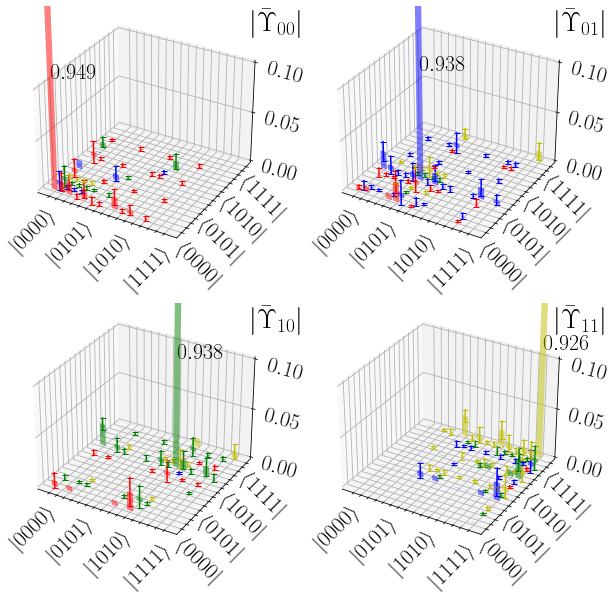

In [18]:
choi_double_mean = np.mean( choi_double, axis=(0,1,2) )
choi_double_std = np.std( choi_double, axis=(0,1,2) )

pos_label = [16., 16, 0.13]
Labels = [ r'$|\bar\Upsilon_{00}|$', r'$|\bar\Upsilon_{01}|$', r'$|\bar\Upsilon_{10}|$', r'$|\bar\Upsilon_{11}|$' ]
pos_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
x_ticks = [r'$|0000\rangle$', '', '', '', '', r'$|0101\rangle$', '', '', '', '',
             r'$|1010\rangle$', '', '', '', '', r'$|1111\rangle$']
y_ticks = [r'$\langle 0000|$', '', '', '', '', r'$\langle 0101|$', 
            '', '', '', '', r'$\langle 1010|$', '', '', '', '', r'$\langle 1111|$']
axes = Plot_Chois( choi_double_mean, choi_double_std, shape=(2,2) )
axes = set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_double_mean_grid.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_double_mean_grid.svg', bbox_inches='tight', transparent=True )


In [19]:
np.sort( abs(choi_double_mean)[3].flatten() )

array([5.54191692e-07, 5.54191692e-07, 7.13517588e-07, 7.13517588e-07,
       1.10067218e-06, 1.10067218e-06, 1.10881769e-06, 1.10881769e-06,
       1.22197799e-06, 1.22197799e-06, 1.55896085e-06, 1.55896085e-06,
       1.89927794e-06, 1.89927794e-06, 3.62617679e-06, 3.62617679e-06,
       3.64286687e-06, 3.64286687e-06, 4.37570807e-06, 4.37570807e-06,
       5.20012474e-06, 5.20012474e-06, 5.67470047e-06, 5.67470047e-06,
       5.70672917e-06, 5.70672917e-06, 5.74493661e-06, 5.74493661e-06,
       6.07611849e-06, 6.07611849e-06, 6.47015680e-06, 6.47015680e-06,
       7.46123848e-06, 7.46123848e-06, 8.08717214e-06, 8.43437541e-06,
       8.43437541e-06, 8.60847069e-06, 8.60847069e-06, 8.64646332e-06,
       8.64646332e-06, 9.92450601e-06, 9.92450601e-06, 1.18331288e-05,
       1.18331288e-05, 1.18490212e-05, 1.18490212e-05, 1.18519346e-05,
       1.18519346e-05, 1.42356441e-05, 1.42356441e-05, 1.47974055e-05,
       1.47974055e-05, 1.52279797e-05, 1.52279797e-05, 1.55023090e-05,
      

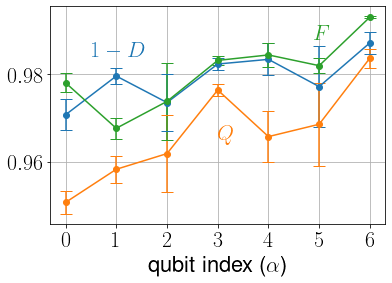

In [20]:
quantities_single_mean = np.mean(quantities_single,axis=0)
quantities_single_std = np.std(quantities_single,axis=0)


for j in [2,1,0]:
    plt.errorbar( range(7), quantities_single_mean[:,j], quantities_single_std[:,j], capsize=6,  fmt='-o' )
plt.grid()
plt.xlabel('qubit index ($\\alpha$)')
plt.xticks([0,1,2,3,4,5,6])
# plt.ylim( bottom=0.925)
plt.text( 4.9, 0.988, '$F$', color='tab:green' )
plt.text( 3, 0.965, '$Q$', color='tab:orange' )
plt.text( 0.5, 0.984, '$1-D$', color='tab:blue' )
plt.savefig('quantities_single.svg', bbox_inches='tight', transparent=True )
plt.savefig('quantities_single.png', bbox_inches='tight', transparent=True  )

In [21]:
quantities_single_mean

array([[0.97804071, 0.95069468, 0.97071738],
       [0.96763507, 0.95826974, 0.97957303],
       [0.97378178, 0.96185535, 0.97351777],
       [0.98314801, 0.97638326, 0.98231983],
       [0.98439791, 0.96573699, 0.98338858],
       [0.98194748, 0.96856027, 0.97716175],
       [0.99303923, 0.98367593, 0.98716411]])

In [22]:
import seaborn as sns
import matplotlib

def create_color_map( error_mean, vmin=0, vmax=100, **args):
    color_map = sns.cubehelix_palette( reverse=True, as_cmap=True, **args)
    colors = matplotlib.colors.Normalize( vmin=vmin, vmax=vmax )
    l_colors = [255*np.array(color_map(colors(100*err))) for err in error_mean ]
    return 255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

In [23]:
np.mean(quantities_single,axis=(0,1))

array([0.98028431, 0.96645375, 0.97912035])

In [24]:
create_color_map(np.mean( quantities_single, (0,2) ), 96, 99, start=2.8, rot=.1 )

(array([ 28.80987579,  38.16447768,  62.18182783, 255.        ]),
 array([217.75517571, 211.88998467, 242.34884824, 255.        ]),
 [array([ 65.18201614,  75.30755998, 118.30862295, 255.        ]),
  array([ 76.39660495,  85.59298838, 132.55610384, 255.        ]),
  array([ 84.7606518 ,  93.05365386, 142.45605758, 255.        ]),
  array([156.53446498, 154.54051182, 207.82530584, 255.        ]),
  array([138.54301286, 139.09759144, 194.26856126, 255.        ]),
  array([125.10210006, 127.69243143, 183.00780832, 255.        ]),
  array([205.08839129, 199.06283869, 236.60389124, 255.        ])])

In [25]:
quantities_single_mean

array([[0.97804071, 0.95069468, 0.97071738],
       [0.96763507, 0.95826974, 0.97957303],
       [0.97378178, 0.96185535, 0.97351777],
       [0.98314801, 0.97638326, 0.98231983],
       [0.98439791, 0.96573699, 0.98338858],
       [0.98194748, 0.96856027, 0.97716175],
       [0.99303923, 0.98367593, 0.98716411]])

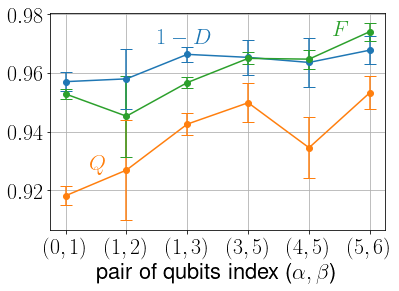

In [26]:
order_pairs = [ 3, 4, 0, 2, 1, 5 ]
quantities_double_mean = np.mean(quantities_double, axis=0)
quantities_double_std = np.std(quantities_double, axis=0)
for j in [2,1,0]:
    plt.errorbar( range(6), quantities_double_mean[order_pairs,j], quantities_double_std[order_pairs,j], capsize=6,  fmt='-o' )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 4.4, 0.973, '$F$', color='tab:green' )
plt.text( 0.4, 0.927, '$Q$', color='tab:orange' )
plt.text( 1.5, 0.97, '$1-D$', color='tab:blue' )
plt.grid()
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('quantities_double_mean.png', bbox_inches='tight', transparent=True )
plt.savefig('quantities_double_mean.svg', bbox_inches='tight', transparent=True )


In [27]:
quantities_double_mean

array([[0.95677225, 0.94260399, 0.96639694],
       [0.96476441, 0.93454318, 0.96364403],
       [0.96502979, 0.9498919 , 0.96537033],
       [0.95289284, 0.91816056, 0.95708964],
       [0.94530524, 0.92691291, 0.95803933],
       [0.97416371, 0.95334504, 0.9678307 ]])

In [28]:
np.mean(quantities_double_mean,axis=0)

array([0.95982137, 0.93757626, 0.96306183])

In [29]:
np.mean( quantities_double, (0,2) )

array([0.95525773, 0.95431721, 0.96009734, 0.94271435, 0.94341916,
       0.96511315])

In [30]:
create_color_map(np.mean( quantities_double, (0,2) )[order_pairs], 94, 97, rot = -.4  )

(array([ 27.77491317,  38.77109381,  61.7507723 , 255.        ]),
 array([198.59433255, 228.9180809 , 203.27276485, 255.        ]),
 [array([ 36.41701527,  57.54401704,  82.9447735 , 255.        ]),
  array([ 38.4728727 ,  62.38444258,  87.73922931, 255.        ]),
  array([ 84.44995118, 148.88655626, 143.83553126, 255.        ]),
  array([115.09633091, 179.69551079, 158.64276407, 255.        ]),
  array([ 80.01312508, 143.16409232, 141.17465528, 255.        ]),
  array([154.98532324, 206.81042325, 177.14737459, 255.        ])])

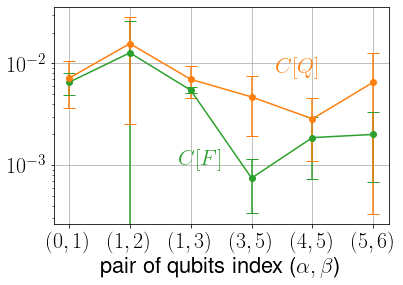

In [31]:
correlations_mean = np.mean(correlations, axis=0 )
correlations_std  = np.std(correlations, axis=0 )
errores_mean      = np.mean(errores, axis=0 )
errores_std       = np.std(errores, axis=0 )

color = [ 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']

for j in [0,1]:
    plt.errorbar( range(6), errores_mean[order_pairs,j], errores_std[order_pairs,j], capsize=6,  fmt='-o', c=color[j] )
plt.yscale('log')
plt.grid()
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 1.8, 1e-3, '$C[F]$', color='tab:green' )
plt.text( 3.4, 0.8e-2, '$C[Q]$', color='tab:orange' )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_double_mean_1.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_double_mean_1.svg', bbox_inches='tight', transparent=True )


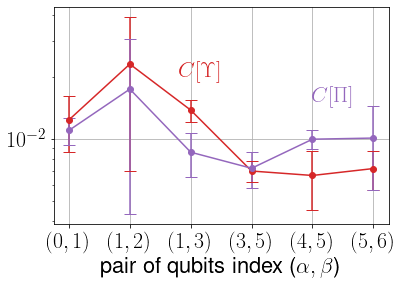

In [32]:
for j in [0,1]:
    plt.errorbar( range(6), correlations_mean[order_pairs,j], correlations_std[order_pairs,j], capsize=6,  fmt='-o', c=color[2+j] )
plt.yscale('log')
plt.grid()
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 4, 1.5e-2, '$C[\\Pi]$', color='tab:purple' )
plt.text( 1.8, 2e-2, '$C[\\Upsilon]$', color='tab:red' )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_double_mean_2.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_double_mean_2.svg', bbox_inches='tight', transparent=True )


In [33]:
correlations_mean

array([[0.01378888, 0.00861447],
       [0.00664197, 0.00996222],
       [0.00697981, 0.00719752],
       [0.01236588, 0.01099477],
       [0.02306178, 0.01743645],
       [0.00717573, 0.01008912]])